In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
temp = pd.read_csv(r"C:\Users\alpes\OneDrive\Desktop\DataCentre\Temp.csv")
ndvi = pd.read_csv(r"C:\Users\alpes\OneDrive\Desktop\DataCentre\NDVI.csv")

In [7]:
ndvi['date'] = pd.to_datetime(ndvi['date'], format='%Y_%m_%d')
ndvi['Year'] = ndvi['date'].dt.year
ndvi['Month'] = ndvi['date'].dt.strftime('%b')


In [8]:
ndvi['NDVI_mean'] = ndvi.iloc[:, 1:133].mean(axis=1)

In [9]:
ndvi_monthly = ndvi.groupby(['Year','Month'])['NDVI_mean'].mean().reset_index()


In [10]:
if temp['Month'].dtype != object:
    month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
    temp['Month'] = temp['Month'].map(month_map)

In [11]:
df = pd.merge(temp, ndvi_monthly, on=['Year','Month'])


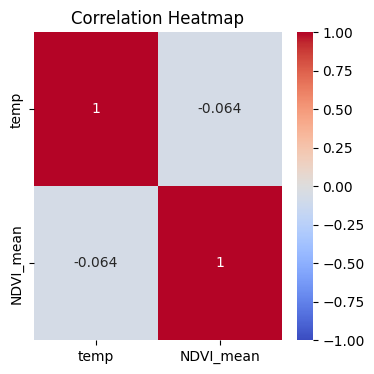

In [12]:
plt.figure(figsize=(4,4))
sns.heatmap(df[['temp','NDVI_mean']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

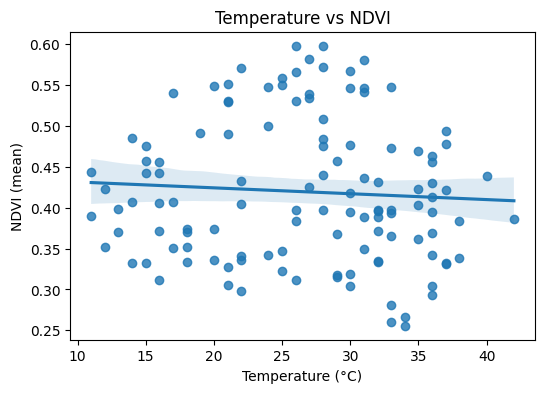

In [13]:
plt.figure(figsize=(6,4))
sns.regplot(x='temp', y='NDVI_mean', data=df)
plt.title('Temperature vs NDVI')
plt.xlabel('Temperature (°C)')
plt.ylabel('NDVI (mean)')
plt.show()

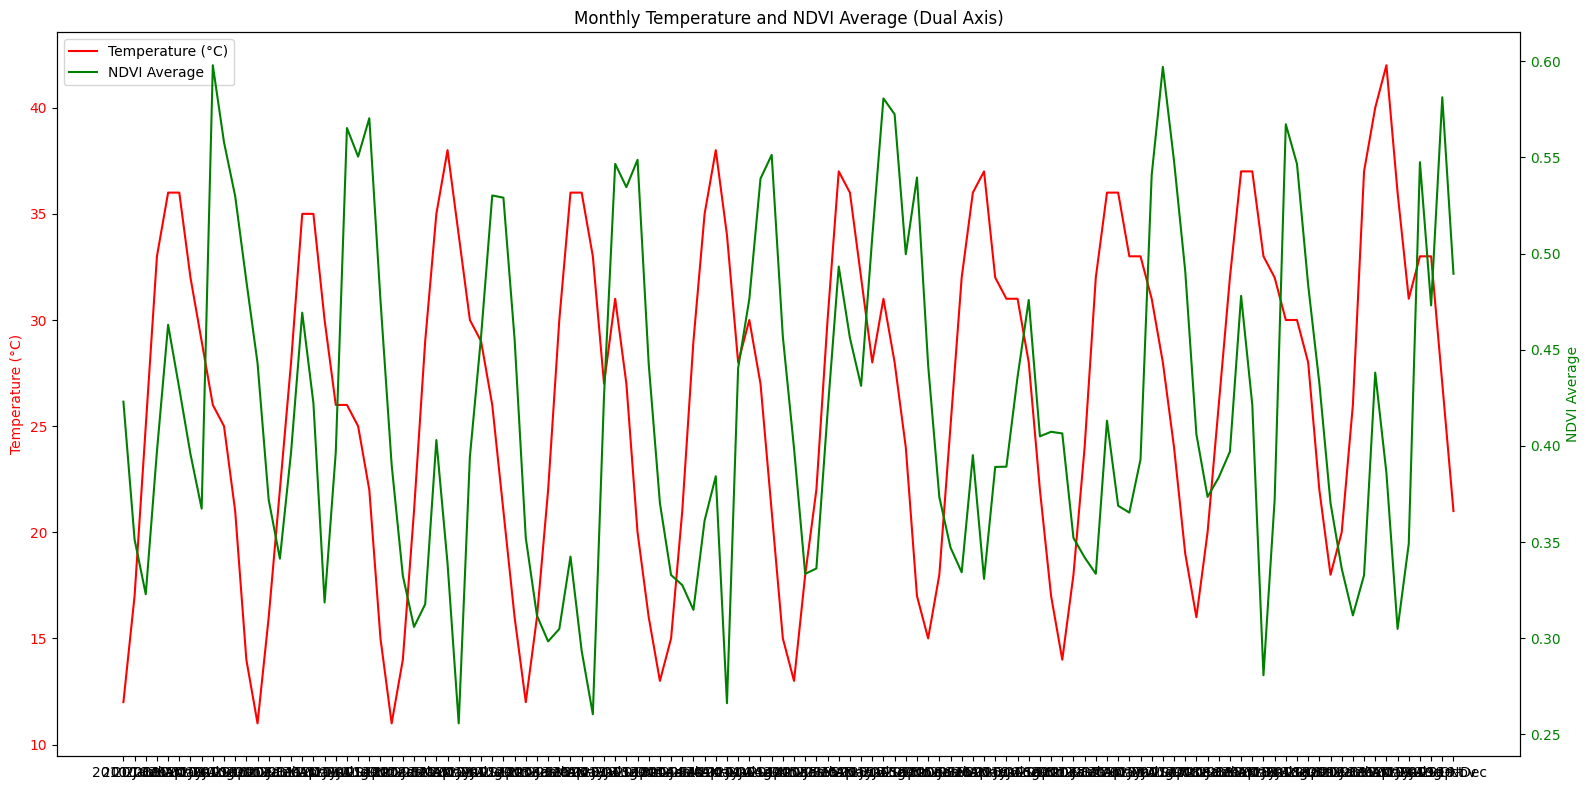

In [15]:
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month']
fig, ax1 = plt.subplots(figsize=(16,8))
ax1.plot(df['Year_Month'], df['temp'], color='red', label='Temperature (°C)')
ax1.set_ylabel('Temperature (°C)', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(df['Year_Month'], df['NDVI_mean'], color='green', label='NDVI Average')
ax2.set_ylabel('NDVI Average', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Monthly Temperature and NDVI Average (Dual Axis)')
plt.xlabel('Year-Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
